In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
!pip install keras-visualizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
print(tf.__version__)

2.11.0


In [3]:
data = [[0.9,0.1,1,0],[0.8,0.2,1,0],[0.7,0.3,1,0],[0.95,0.05,1,0],[0.81,0.19,1,0],
        [0.09,0.91,0,1],[0.08,0.92,0,1],[0.07,0.93,0,1],[0.15,0.85,0,1],[0.19,0.81,0,1]]

**Generating Random Points**

In [4]:
num_points = 100
range_values = [[0, 1], [0, 1], [0, 1], [0, 1]]
random_data = np.zeros((num_points, len(data[0])))


for i in range(num_points):
    j = np.random.randint(len(data))
   
    for k in range(len(data[j])):
        random_data[i,k] = np.random.uniform(data[j][k]-0.1, data[j][k]+0.1)
        random_data[i,k] = np.clip(random_data[i,k], range_values[k][0], range_values[k][1])
print(random_data)

[[1.00000000e+00 1.44176689e-01 1.00000000e+00 0.00000000e+00]
 [5.44642466e-02 9.08958326e-01 0.00000000e+00 9.53718293e-01]
 [7.62229600e-01 2.29287404e-01 9.79336771e-01 7.54484823e-02]
 [1.58158272e-01 9.79802867e-01 0.00000000e+00 9.84792047e-01]
 [1.53300807e-01 9.37708895e-01 3.24677434e-02 1.00000000e+00]
 [7.29221076e-01 2.86380025e-01 9.86731899e-01 1.85677675e-02]
 [1.75074543e-01 9.50998620e-01 0.00000000e+00 1.00000000e+00]
 [2.38944349e-01 8.98906466e-01 0.00000000e+00 9.49172739e-01]
 [1.56390824e-01 9.99688244e-01 0.00000000e+00 1.00000000e+00]
 [7.20662469e-01 3.88244303e-01 1.00000000e+00 0.00000000e+00]
 [2.23749915e-01 8.38944749e-01 0.00000000e+00 1.00000000e+00]
 [1.67966797e-01 8.14709318e-01 0.00000000e+00 1.00000000e+00]
 [8.20010617e-01 1.71906496e-01 1.00000000e+00 0.00000000e+00]
 [8.98156103e-01 1.00513848e-01 1.00000000e+00 2.01658873e-02]
 [1.81760134e-02 9.36872775e-01 0.00000000e+00 9.68316143e-01]
 [1.77013091e-01 9.78663912e-01 6.56952776e-02 9.713603

In [5]:
num_points = 100
range_values = [[0, 0.5], [0.5, 1], [0, 1], [0, 1]]
random_data = np.zeros((num_points, len(data[0])))
for i in range(num_points):
    j = np.random.randint(len(data))
    for k in range(len(data[j])):
        random_data[i,k] = np.random.uniform(data[j][k]-0.1, data[j][k]+0.1)
        random_data[i,k] = np.clip(random_data[i,k], range_values[k][0], range_values[k][1])
print(random_data)

[[0.17991625 0.88652518 0.07209082 1.        ]
 [0.5        0.5        1.         0.03901924]
 [0.5        0.5        0.97120212 0.        ]
 [0.24209365 0.75544247 0.         1.        ]
 [0.15646584 0.89674085 0.         0.96056938]
 [0.03295108 0.83104158 0.0375857  1.        ]
 [0.5        0.5        1.         0.08845868]
 [0.5        0.5        1.         0.05101317]
 [0.14156683 0.84091417 0.         0.96020963]
 [0.18875145 0.9877511  0.01317698 0.92867871]
 [0.5        0.5        1.         0.        ]
 [0.5        0.5        0.92628519 0.02623443]
 [0.5        0.5        1.         0.00721335]
 [0.11285249 0.92611654 0.         1.        ]
 [0.5        0.5        1.         0.0119534 ]
 [0.16779893 1.         0.09459414 1.        ]
 [0.01125479 0.87235696 0.         1.        ]
 [0.5        0.5        1.         0.04146228]
 [0.10321195 0.90392336 0.05570687 1.        ]
 [0.5        0.5        0.9995859  0.03584256]
 [0.5        0.5        1.         0.        ]
 [0.5        

**Concatenating the Data**

In [6]:
all_data = np.concatenate((data, random_data), axis=0)
df = pd.DataFrame(all_data, columns=['x1', 'x2', 'y1', 'y2'])
y = df[['y1', 'y2']]
X = df.drop(['y1', 'y2'], axis=1)

print(df.head())

     x1    x2   y1   y2
0  0.90  0.10  1.0  0.0
1  0.80  0.20  1.0  0.0
2  0.70  0.30  1.0  0.0
3  0.95  0.05  1.0  0.0
4  0.81  0.19  1.0  0.0


In [7]:
df = pd.DataFrame(columns=['x1', 'x2', 'y1', 'y2'], data=all_data)
y = df[['y1', 'y2']]
X = df.drop(['y1', 'y2'], axis=1)

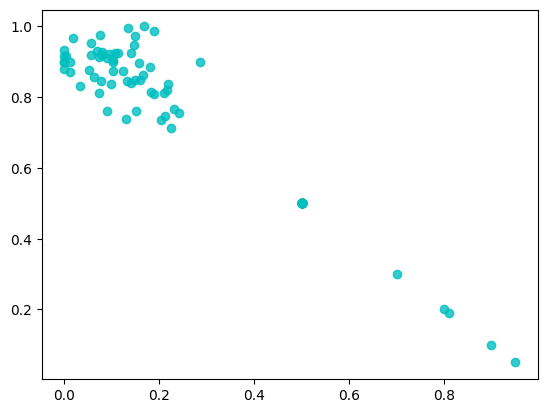

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X['x1'],X['x2'],alpha = 0.8, c = 'c')
plt.show()

In [9]:
import random
import numpy as np
import pandas as pd
data = [[0.9,0.1,1,0],[0.8,0.2,1,0],[0.7,0.3,1,0],[0.95,0.05,1,0],[0.81,0.19,1,0],
        [0.09,0.91,0,1],[0.08,0.92,0,1],[0.07,0.93,0,1],[0.15,0.85,0,1],[0.19,0.81,0,1]]
random_data = []
for i in range(100):
    point = []
    for j in range(4):
        if j < 2:
            point.append(random.uniform(0, 1))
        else:
            point.append(random.randint(0, 1))
    random_data.append(point)
all_data = np.concatenate((data, random_data), axis=0)
df = pd.DataFrame(all_data, columns=['x1', 'x2', 'y1', 'y2'])

y = df[['y1', 'y2']]
X = df.drop(['y1', 'y2'], axis=1)

print(df.head())

     x1    x2   y1   y2
0  0.90  0.10  1.0  0.0
1  0.80  0.20  1.0  0.0
2  0.70  0.30  1.0  0.0
3  0.95  0.05  1.0  0.0
4  0.81  0.19  1.0  0.0


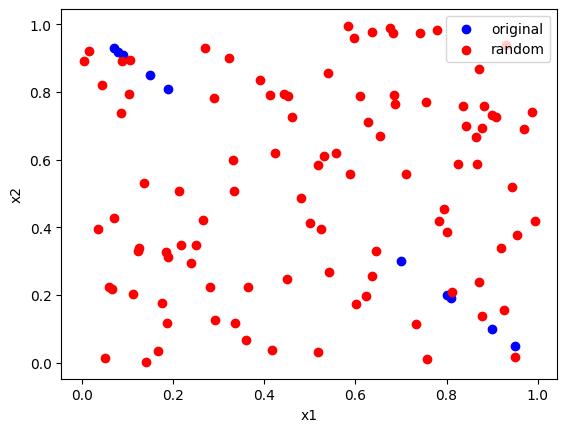

In [10]:
import matplotlib.pyplot as plt
original_data = df[:10]
random_data = df[10:]
plt.scatter(original_data['x1'], original_data['x2'], c='blue', label='original')
plt.scatter(random_data['x1'], random_data['x2'], c='red', label='random')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y['y1'], test_size=0.2, random_state=21)
print(test_y)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

46     1.0
101    1.0
29     1.0
93     0.0
23     1.0
55     1.0
42     0.0
26     0.0
45     1.0
90     0.0
78     1.0
58     1.0
49     0.0
92     1.0
13     1.0
36     1.0
11     1.0
19     1.0
51     0.0
21     1.0
97     0.0
37     1.0
Name: y1, dtype: float64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=21)
print(test_y)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 1)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(2)])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.summary()

      y1   y2
46   1.0  1.0
101  1.0  1.0
29   1.0  0.0
93   0.0  1.0
23   1.0  0.0
55   1.0  0.0
42   0.0  0.0
26   0.0  1.0
45   1.0  0.0
90   0.0  1.0
78   1.0  1.0
58   1.0  1.0
49   0.0  0.0
92   1.0  0.0
13   1.0  1.0
36   1.0  1.0
11   1.0  1.0
19   1.0  0.0
51   0.0  1.0
21   1.0  1.0
97   0.0  1.0
37   1.0  0.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [13]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print(model.get_weights())
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))
        
model.fit(train_x, train_y, batch_size=None, epochs=500, callbacks=[CustomCallback()]) # None means 32

Streaming output truncated to the last 5000 lines.
...Training: start of batch 2; got log keys: []
3/3 [==============================] - 0s 19ms/step - loss: 0.2528 - accuracy: 0.3068
Epoch 144/500
[array([[-0.24077046,  0.79889977],
       [-0.85020334,  0.6609708 ]], dtype=float32), array([-0.13635848, -0.13067544], dtype=float32), array([[0.660309  , 0.572451  ],
       [0.63378674, 0.5972583 ]], dtype=float32), array([-0.1596221 , -0.09060182], dtype=float32)]
...Training: start of batch 0; got log keys: []
1/3 [=========>....................] - ETA: 0s - loss: 0.2499 - accuracy: 0.3125[array([[-0.24107797,  0.79855746],
       [-0.85005546,  0.6612123 ]], dtype=float32), array([-0.13643906, -0.1307266 ], dtype=float32), array([[0.6602872 , 0.57223433],
       [0.63369155, 0.5971765 ]], dtype=float32), array([-0.15968773, -0.09069055], dtype=float32)]
...Training: start of batch 1; got log keys: []
[array([[-0.24137585,  0.7982272 ],
       [-0.84990954,  0.6614497 ]], dtype=float

In [14]:
est_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.2683 - accuracy: 0.1364 - 315ms/epoch - 315ms/step

Test accuracy: 0.13636364042758942


In [15]:
model.get_weights()

[array([[-0.51037717,  0.44550472],
        [-0.61069506,  1.0413347 ]], dtype=float32),
 array([-0.13291214, -0.11971984], dtype=float32),
 array([[0.7213061 , 0.4467739 ],
        [0.58881336, 0.6631715 ]], dtype=float32),
 array([-0.1589785 , -0.08997672], dtype=float32)]